In [1]:
### IGNORE THIS -- THIS IS JUST DATA FORMATTING STUFF TO MAKE THE .pickle FILE

#dx = pd.read_csv('dx.csv',header=None)
#Nx = pd.read_csv('Nx.csv',header=None)
#Ny = pd.read_csv('Ny.csv',header=None)
#x_coast_NARR = pd.read_csv('x_coast_NARR.csv',header=None)
#x_dom = pd.read_csv('x_dom.csv',header=None)
#x_domp = pd.read_csv('x_domp.csv',header=None)
#x_GCM = pd.read_csv('x_GCM.csv',header=None)
#x_NARR = pd.read_csv('x_NARR.csv',header=None)
#xE = pd.read_csv('xE.csv',header=None)
#xW = pd.read_csv('xW.csv',header=None)
#y_coast_NARR = pd.read_csv('y_coast_NARR.csv',header=None)
#y_dom = pd.read_csv('y_dom.csv',header=None)
#y_domp = pd.read_csv('y_domp.csv',header=None)
#y_GCM = pd.read_csv('y_GCM.csv',header=None)
#y_NARR = pd.read_csv('y_NARR.csv',header=None)
#yN = pd.read_csv('yN.csv',header=None)
#yS = pd.read_csv('yS.csv',header=None)

#coordinates_for_plots_dict = {
#    'dx':dx.get_values(),
#    'Nx':Nx.get_values(),
#    'Ny':Ny.get_values(),
#    'x_coast_NARR':x_coast_NARR.get_values(),
#    'x_dom':x_dom.get_values(),
#    'x_domp':x_domp.get_values(),
#    'x_GCM':x_GCM.get_values(),
#    'x_NARR':x_NARR.get_values(),
#    'xE':xE.get_values(),
#    'xW':xW.get_values(),
#    'y_coast_NARR':y_coast_NARR.get_values(),
#    'y_dom':y_dom.get_values(),
#    'y_domp':y_domp.get_values(),
#    'y_GCM':y_GCM.get_values(),
#    'y_NARR':y_NARR.get_values(),
#    'yN':yN.get_values(),
#    'yS':yS.get_values(),
#}

#pickle_out = open("coordinates_for_plots.pickle","wb")
#pickle.dump(coordinates_for_plots_dict, pickle_out)
#pickle_out.close()

#pickle_in = open("coordinates_for_plots.pickle","rb")
#coordinates_for_plots_dict = pickle.load(pickle_in)

In [ ]:
#Install a conda package in the current Jupyter kernel
#You'll need to have a package called netCDF4 to open the dataset 
#Option 1: Use "conda install -c anaconda netcdf4" (without the "s) in your environment in terminal; if those words mean nothing to you, you can try Option 2
#Option 2: Run the following 2 lines of code to get the netCDF4 library installed in this Jupyter session

Option2 = True #change to True if you want to use option 2, change to False if not

if Option2:
    import sys
    !conda install --yes --prefix {sys.prefix} netCDF4

In [45]:
#import required libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import pickle
from netCDF4 import Dataset
from scipy.signal import find_peaks
import ipywidgets

In [46]:
#load useful data for making plots and unpack into individual variables 
pickle_in = open("coordinates_for_plots.pickle","rb")
coordinates_for_plots_dict = pickle.load(pickle_in)

dx = coordinates_for_plots_dict['dx'][0][0]
Nx = coordinates_for_plots_dict['Nx'][0][0]
Ny = coordinates_for_plots_dict['Ny'][0][0]
x_coast_NARR = coordinates_for_plots_dict['x_coast_NARR'][0]
x_dom = coordinates_for_plots_dict['x_dom'][0]
x_domp = coordinates_for_plots_dict['x_domp'][0]
x_GCM = coordinates_for_plots_dict['x_GCM'][0]
x_NARR = coordinates_for_plots_dict['x_NARR']
xE = coordinates_for_plots_dict['xE'][0]
xW = coordinates_for_plots_dict['xW'][0]
y_coast_NARR = coordinates_for_plots_dict['y_coast_NARR'][0]
y_dom = coordinates_for_plots_dict['y_dom'][0]
y_domp = coordinates_for_plots_dict['y_domp'][0]
y_GCM = coordinates_for_plots_dict['y_GCM'][0]
y_NARR = coordinates_for_plots_dict['y_NARR']
yN = coordinates_for_plots_dict['yN'][0]
yS = coordinates_for_plots_dict['yS'][0]
incrop = pd.read_csv('incrop.csv',header=None)

# Example 1
PCA on real data.  Gridded daily sea level pressure data for North Pacific domain from CFSR climate reanalysis.  Period: 1 Jan 1979 to 31 Dec 2010.  The .csv file is organized so that rows are grid cells (representing the SLP value (Pa) for given latitude and longitude) while columns are days (1979 - 2010).

NOTE: This isn't the exact same as the MATLAB scripts -- the only difference is that the MATLAB version clips the domain to a smaller segment.  If anyone looks at both and has a simple python script for it, please let me know.

In [47]:
#load sea level pressure data
#NOTE: The sea level pressure file is large (>100MB), so you will have to download it and change the path here

#change 'SLP_directory' to wherever you've saved the SLP file
SLP_directory = '/Users/samanderson/repos/eosc_410/Tutorial4/'
SLP_filename = 'SLP_CFSR_daily_200km_cropped_1979_2010.csv'
SLP = pd.read_csv(SLP_directory + SLP_filename,header=None, engine = 'python')

#rows 0 and 54 are all NaN -- fill with adjacent values 
SLP.iloc[0] = SLP.iloc[1]
SLP.iloc[54] = SLP.iloc[53]

/Users/samanderson/anaconda3/envs/eosc_410/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  if __name__ == '__main__':


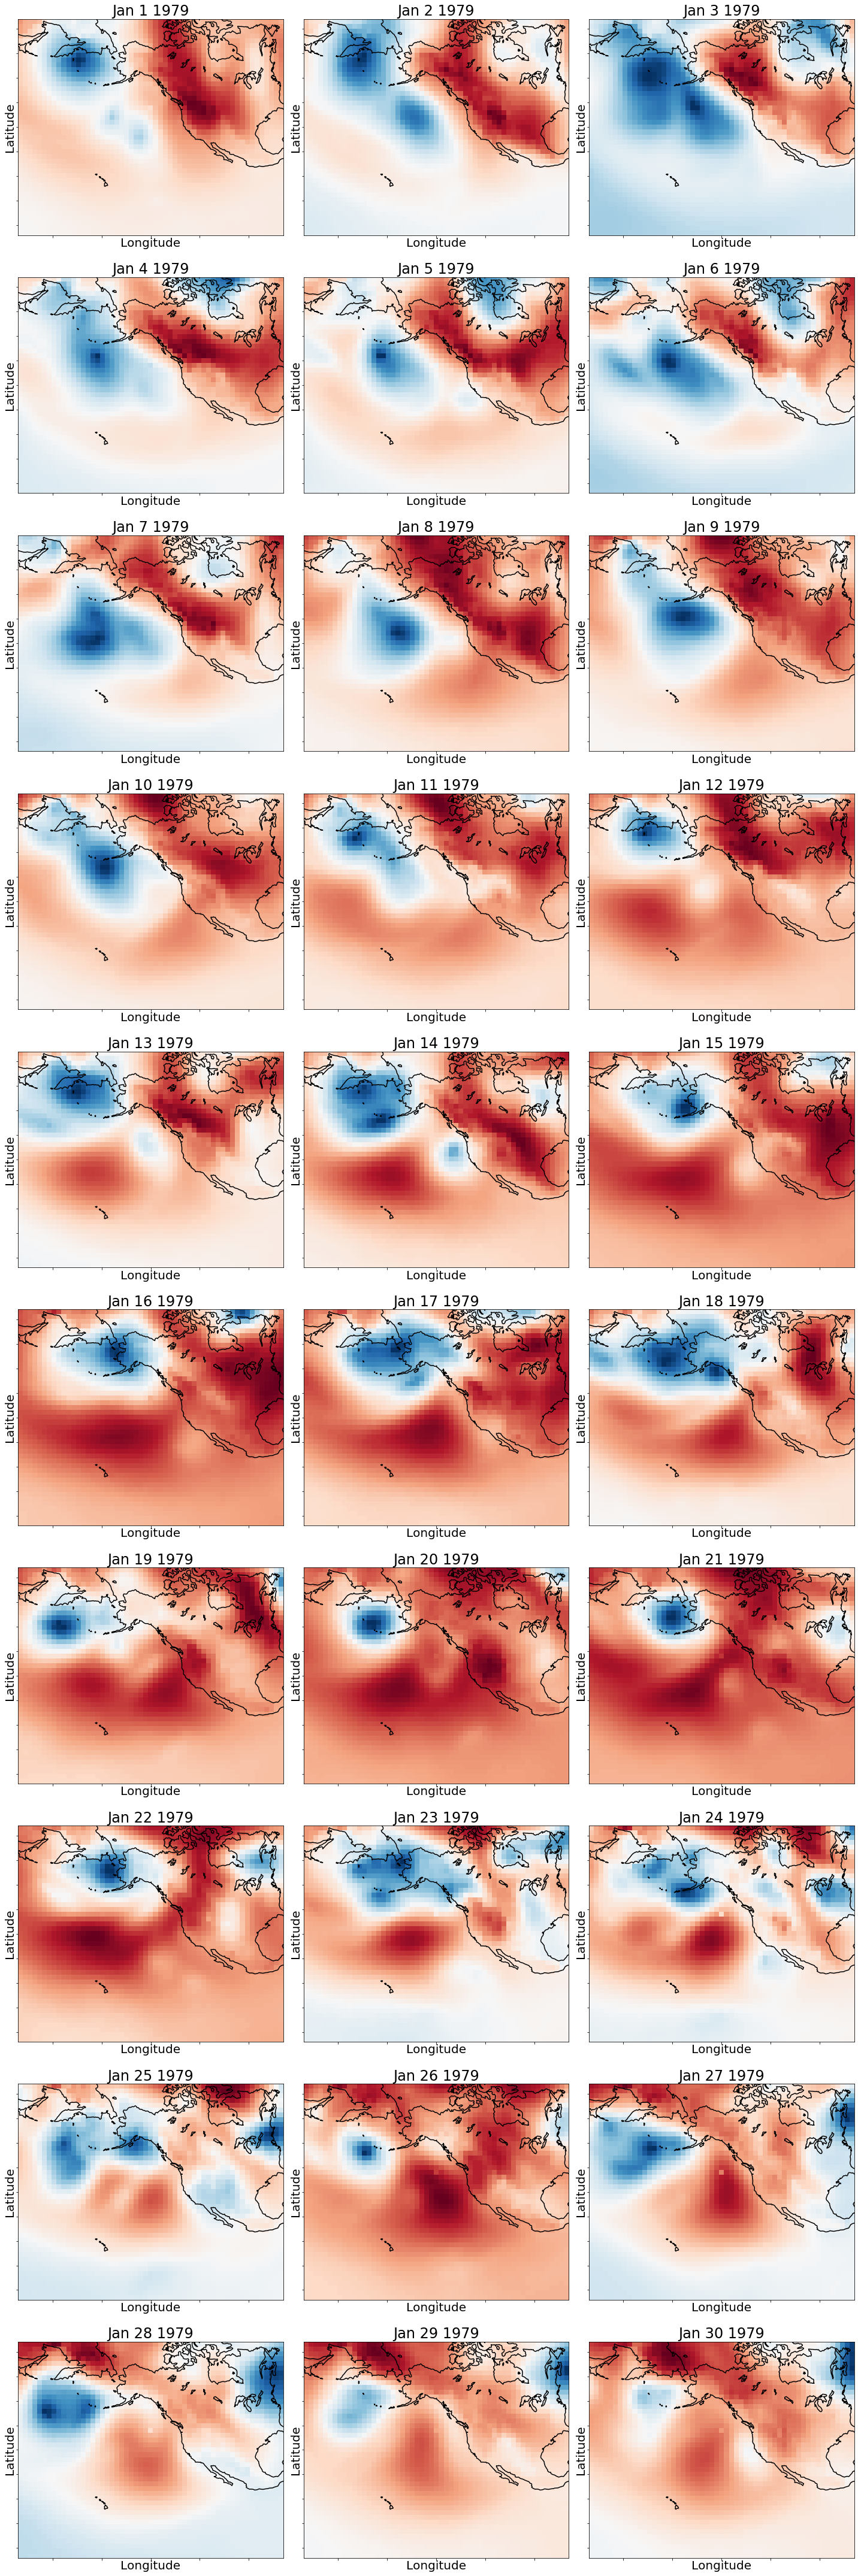

In [48]:
#try plotting the data for January 1979 to see what we're working with

saveIt = 0

plt.figure(figsize=(20,60))

for ii in range(30):
    
    SLP_plot = np.reshape(SLP[ii].get_values(),(Ny,Nx))
    extent = [np.nanmin(x_NARR), np.nanmax(x_NARR), np.nanmin(y_NARR), np.nanmax(y_NARR)]
    
    plt.subplot(10,3,ii+1)
    plt.imshow(np.flipud(SLP_plot),extent = extent,cmap='RdBu_r')
    plt.plot(x_coast_NARR,y_coast_NARR,color='k')
    
    plt.title('Jan '+str(ii+1)+' 1979', fontsize = 24)
    plt.xlabel('Longitude', fontsize = 20)
    plt.ylabel('Latitude', fontsize = 20)
    plt.xlim((np.nanmin(x_NARR), np.nanmax(x_NARR)))
    plt.ylim((np.nanmin(y_NARR), np.nanmax(y_NARR)))
    plt.tick_params(labelbottom=False, labelleft=False)

plt.tight_layout()

if saveIt:
    plt.savefig('tutorial4_fig1.png')

plt.show()

/Users/samanderson/anaconda3/envs/eosc_410/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  import sys


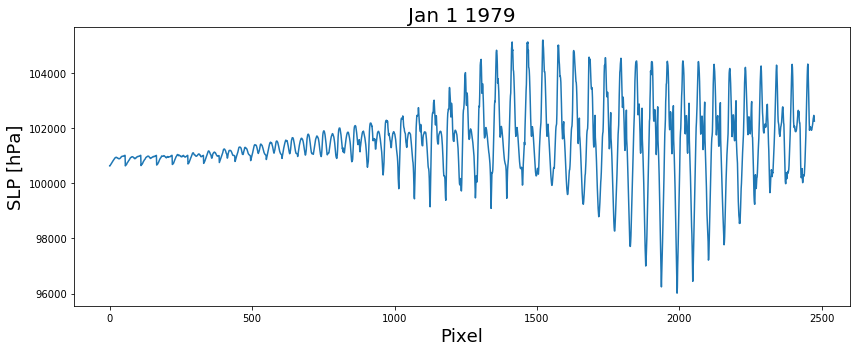

In [50]:
#plot first day as a 1D vector

saveIt = 1

plt.figure(figsize=(12,5))

SLP_plot = SLP[0].get_values()

plt.plot(SLP_plot)

plt.title('Jan 1 1979', fontsize = 20)
plt.xlabel('Pixel', fontsize = 18)
plt.ylabel('SLP [hPa]', fontsize = 18)

plt.tight_layout()

if saveIt:
    plt.savefig('tutorial4_fig2.png')

plt.show()

In [51]:
#now, do PCA

n_modes = np.min(np.shape(SLP))
pca = PCA(n_components = n_modes)
PCs = pca.fit_transform(SLP.T)
eigvecs = pca.components_
fracVar = pca.explained_variance_ratio_

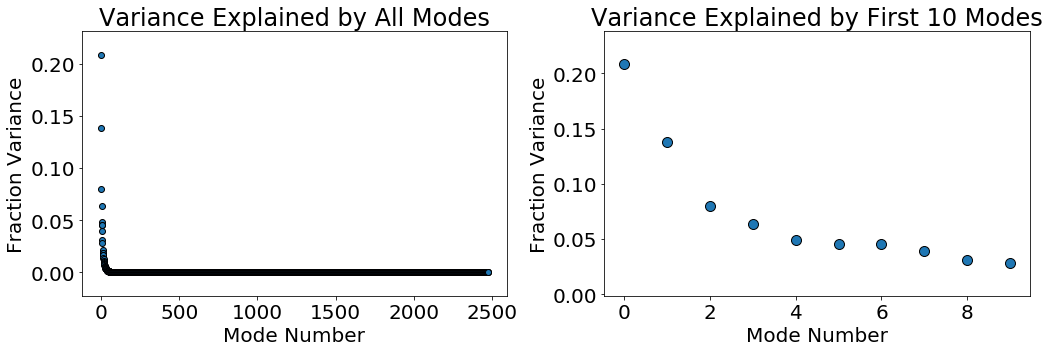

In [52]:
#plot fraction of variance explained by each mode

saveIt = 0

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.scatter(range(len(fracVar)),fracVar, edgecolor = 'k')
plt.xlabel('Mode Number', fontsize = 20)
plt.ylabel('Fraction Variance', fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.title('Variance Explained by All Modes', fontsize = 24)

plt.subplot(1,2,2)
n_modes_show = 10
plt.scatter(range(n_modes_show),fracVar[:n_modes_show], s = 100, edgecolor = 'k')
plt.xlabel('Mode Number', fontsize = 20)
plt.ylabel('Fraction Variance', fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.title('Variance Explained by First ' + str(n_modes_show) + ' Modes', fontsize = 24)

plt.tight_layout()

if saveIt:
    plt.savefig('tutorial4_fig3.png')

plt.show()

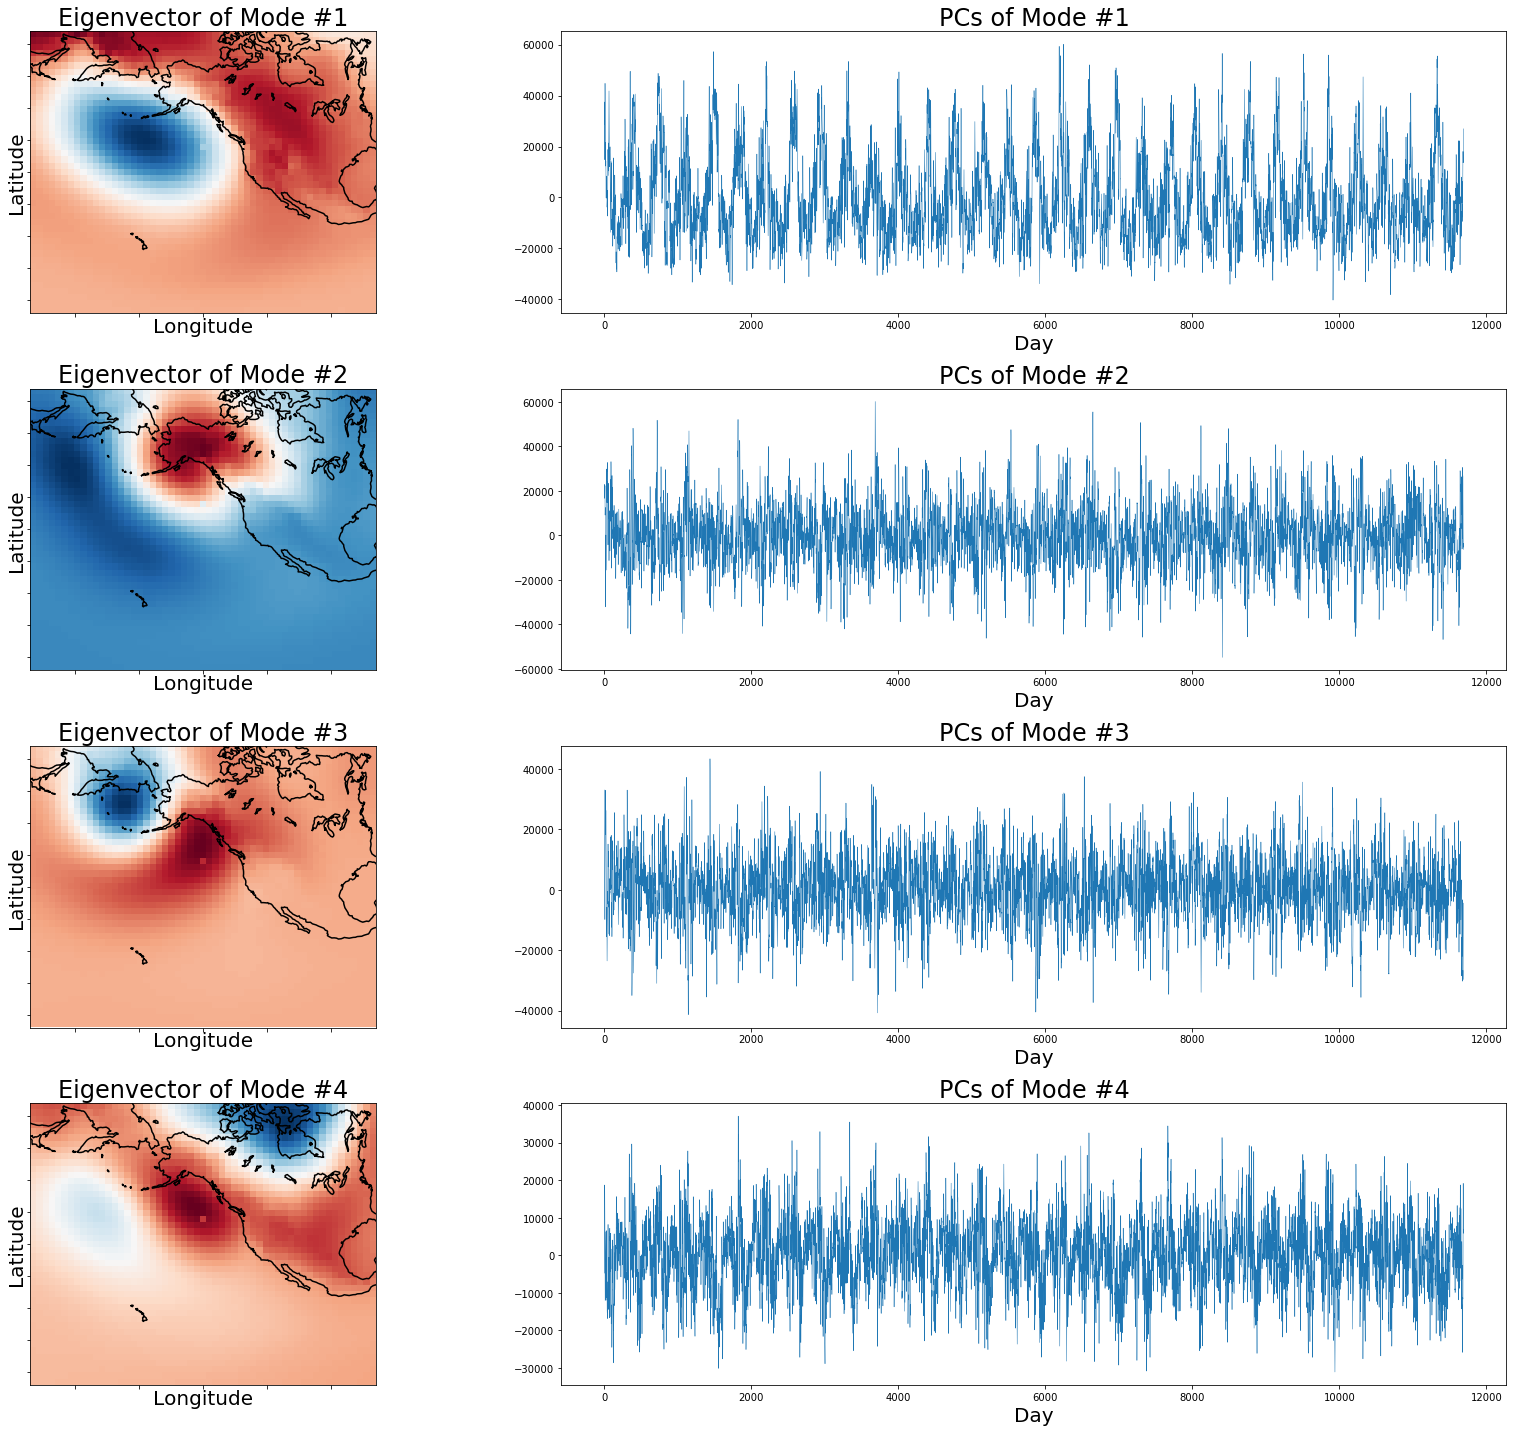

In [53]:
#plot the first n modes and PCs -- choose a value of 'n' from the variance explained figure!

saveIt = 0

n = 4

plt.figure(figsize=(25,5*n))
for kk in range(n):
    
    plt.subplot(n,2,kk*2+1)
    plt.imshow(np.flipud(np.reshape(eigvecs[kk],(Ny,Nx))),extent = extent,cmap='RdBu_r')
    plt.plot(x_coast_NARR,y_coast_NARR,color='k')
    plt.xlabel('Longitude', fontsize = 20)
    plt.ylabel('Latitude', fontsize = 20)
    plt.xlim((np.nanmin(x_NARR), np.nanmax(x_NARR)))
    plt.ylim((np.nanmin(y_NARR), np.nanmax(y_NARR)))
    plt.tick_params(labelbottom=False, labelleft=False)
    plt.title('Eigenvector of Mode #' + str(kk+1), fontsize = 24)
    
    plt.subplot(n,2,(kk+1)*2)
    plt.plot(PCs[:,kk], linewidth = 0.5)
    plt.title('PCs of Mode #' + str(kk+1), fontsize = 24)
    plt.xlabel('Day', fontsize = 20)
    
plt.tight_layout()

if saveIt:
    plt.savefig('tutorial4_fig4.png')
    
plt.show()

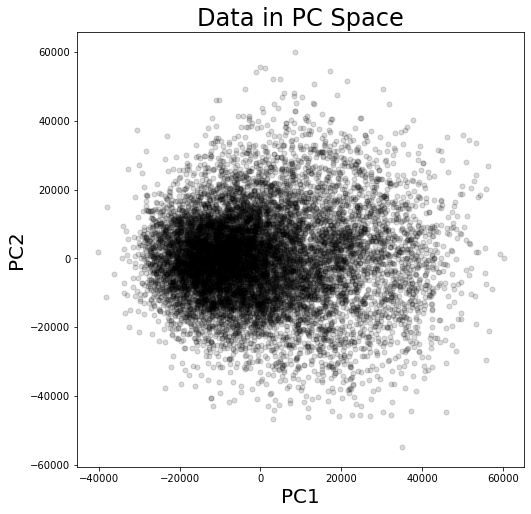

In [54]:
#plot PC1 vs PC2 

saveIt = 0

plt.figure(figsize=(8,8))
plt.scatter(PCs[:,0],PCs[:,1],s=25,alpha=0.15, color = 'k')
plt.xlabel('PC1', fontsize = 20)
plt.ylabel('PC2', fontsize = 20)
plt.title('Data in PC Space', fontsize = 24)

if saveIt:
    plt.savefig('tutorial4_fig5.png')

plt.show()

/Users/samanderson/anaconda3/envs/eosc_410/lib/python3.7/site-packages/ipykernel_launcher.py:29: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.


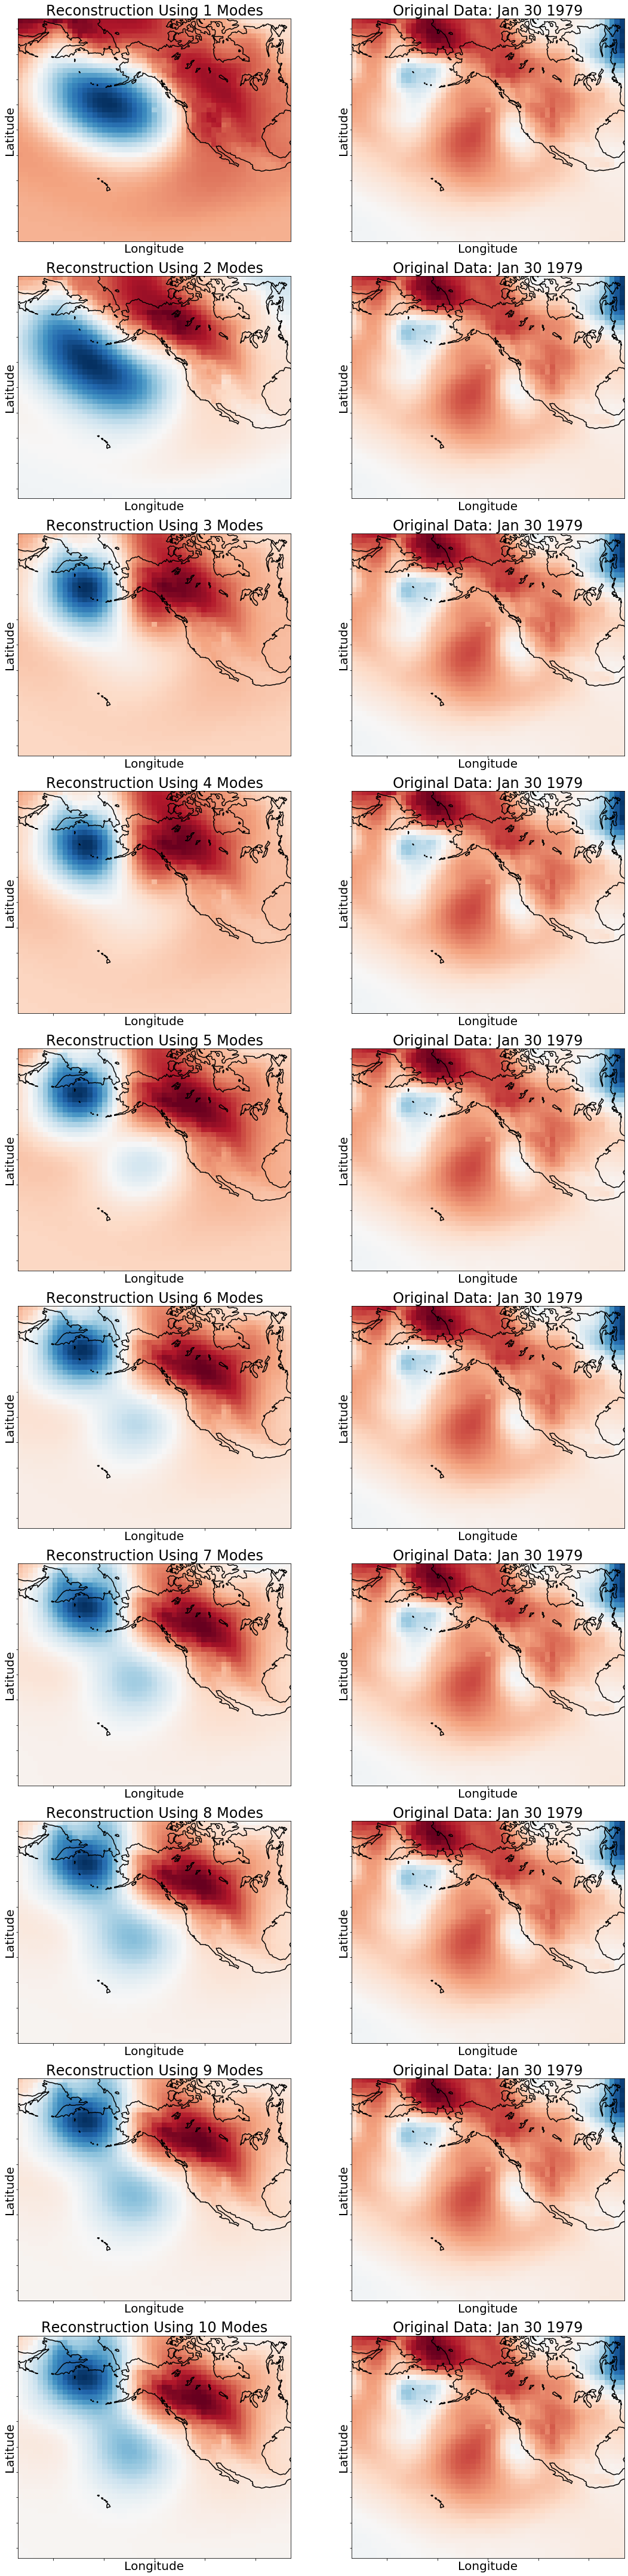

In [55]:
#plot Jan 1, and show how reconstructions improve based on how many modes we keep

saveIt = 0

n_modes_max = 10

plt.figure(figsize=(16,6*n_modes_max))
    
for n_modes in range(n_modes_max):
    
    #plot reconstruction with n_modes
    
    SLP_rec = np.zeros_like(eigvecs[0])
    for kk in range(n_modes+1):
        SLP_rec += eigvecs[kk]*PCs[0,kk]
    
    plt.subplot(n_modes_max,2,n_modes*2+1)
    plt.imshow(np.flipud(np.reshape(SLP_rec,(Ny,Nx))),extent = extent,cmap='RdBu_r')
    plt.plot(x_coast_NARR,y_coast_NARR,color='k')
    plt.xlabel('Longitude', fontsize = 20)
    plt.ylabel('Latitude', fontsize = 20)
    plt.xlim((np.nanmin(x_NARR), np.nanmax(x_NARR)))
    plt.ylim((np.nanmin(y_NARR), np.nanmax(y_NARR)))
    plt.tick_params(labelbottom=False, labelleft=False)
    plt.title('Reconstruction Using ' + str(kk+1) + ' Modes', fontsize = 24)
    
    #plot original data for this day
    
    SLP_plot = np.reshape(SLP[ii].get_values(),(Ny,Nx))
    extent = [np.nanmin(x_NARR), np.nanmax(x_NARR), np.nanmin(y_NARR), np.nanmax(y_NARR)]

    plt.subplot(n_modes_max,2,n_modes*2+2)
    plt.imshow(np.flipud(SLP_plot),extent = extent,cmap='RdBu_r')
    plt.plot(x_coast_NARR,y_coast_NARR,color='k')

    plt.title('Original Data: Jan '+str(ii+1)+' 1979', fontsize = 24)
    plt.xlabel('Longitude', fontsize = 20)
    plt.ylabel('Latitude', fontsize = 20)
    plt.xlim((np.nanmin(x_NARR), np.nanmax(x_NARR)))
    plt.ylim((np.nanmin(y_NARR), np.nanmax(y_NARR)))
    plt.tick_params(labelbottom=False, labelleft=False)

plt.tight_layout()

if saveIt:
    plt.savefig('tutorial4_fig6.png')
    
plt.show()

# Example 2
Gridded monthly sea surface temperatuer data for the tropical Pacific from ERA interim reanalysis.  Period: Jan 1979 to Jun 2017

In [56]:
#load SST data from .csv file and check it out; rows are months, columns are locations
dataSST = pd.read_csv('SST_anomalies_data.csv',header=None)

filename = 'SST_ERAInterim_monthly_Jan1979_Jun2017_Tropical_Pacific.nc'
dataSST = Dataset(filename)
lonERA = -360+dataSST.variables['longitude'][:] #in degrees E
latERA = dataSST.variables['latitude'][:] #in degrees N
timeERA = dataSST.variables['time'][:] #in hours since year 1900... not a great unit, but it's what ERA comes in
T = dataSST.variables['sst'] #in K

months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
SST_extent=[-360+159.75,-360+260.25,-10.5,10.5] #these are just the known boundaries of the SST grid [lonmin,lonmax,latmin,latmax] for plotting

#load coastline data
coasts = pd.read_csv('coastline.csv',header=None)
coastLat = coasts[0]
coastLon = coasts[1]

In [57]:
#reformat data from 3D to 2D, where rows are grid points, columns are months

T2d = np.empty((np.shape(T)[1]*np.shape(T)[2],np.shape(T)[0]))
for ii in range(np.shape(T)[0]):
    T2d[:,ii] = np.reshape(T[ii],(np.shape(T)[1]*np.shape(T)[2],))

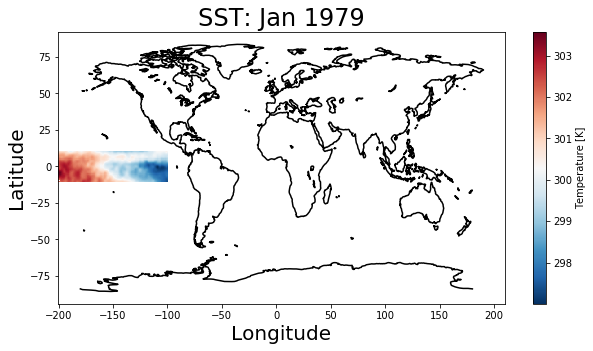

In [58]:
#plot temp over whole domain Jan 1979

saveIt = 0

lonERAmin = np.min(lonERA)
lonERAmax = np.max(lonERA)
latERAmin = np.min(latERA)
latERAmax = np.max(latERA)
T_extent = [lonERAmin,lonERAmax,latERAmin,latERAmax]

plt.figure(figsize = (10,5))
plt.imshow(np.squeeze(T[0,:,:]),extent=T_extent,cmap = 'RdBu_r',aspect='auto')
plt.plot(coastLon,coastLat,c='k')
plt.xlabel('Longitude', fontsize = 20)
plt.ylabel('Latitude', fontsize = 20)
plt.title('SST: Jan 1979', fontsize = 24)
plt.colorbar(label = 'Temperature [K]')

if saveIt:
    plt.savefig('tutorial4_fig7.png')

plt.show()

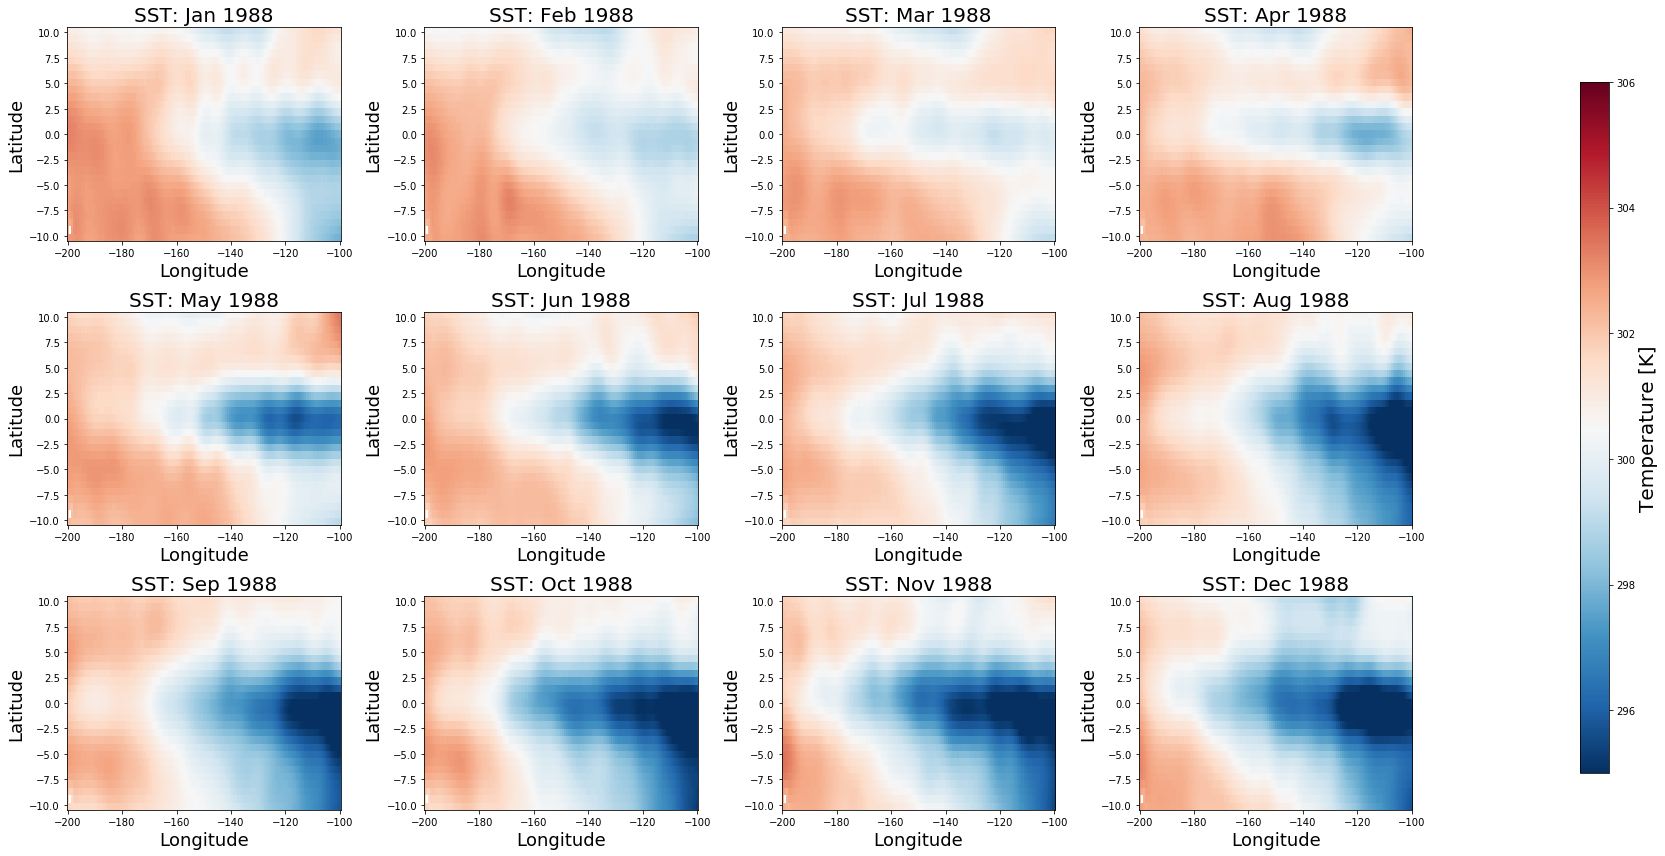

In [59]:
#plot temp for each month in 1988, since this year had a strong La Nina event

saveIt = 0

#vmin = np.min([T[12*9+month,:,:] for month in range(12)])
#vmax = np.max([T[12*9+month,:,:] for month in range(12)])
vmin = 273+22
vmax = 273+33

nrows = 3
ncols = 4
fig,axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*5, nrows*4))

month = 0
for ax in axes.flat:
    #ax.set_axis_off()
    im = ax.imshow(np.squeeze(T[12*9+month,:,:]), extent=T_extent,cmap = 'RdBu_r',vmin=vmin,vmax=vmax,aspect='auto')
    ax.plot(coastLon,coastLat,c='k')
    ax.set_xlim(T_extent[:2])
    ax.set_ylim(T_extent[2:])
    ax.set_xlabel('Longitude', fontsize = 18)
    ax.set_ylabel('Latitude', fontsize = 18)
    ax.set_title('SST: ' + months[month] +' 1988', fontsize = 20)
    #plt.colorbar()
    month+=1
 
plt.tight_layout()
cb_ax = fig.add_axes([1.1, 0.1, 0.02, 0.8])
cbar = fig.colorbar(im, cax=cb_ax)
cb_ax.set_ylabel('Temperature [K]',fontsize = 20)

if saveIt:
    plt.savefig('tutorial4_fig8.png')

plt.show()

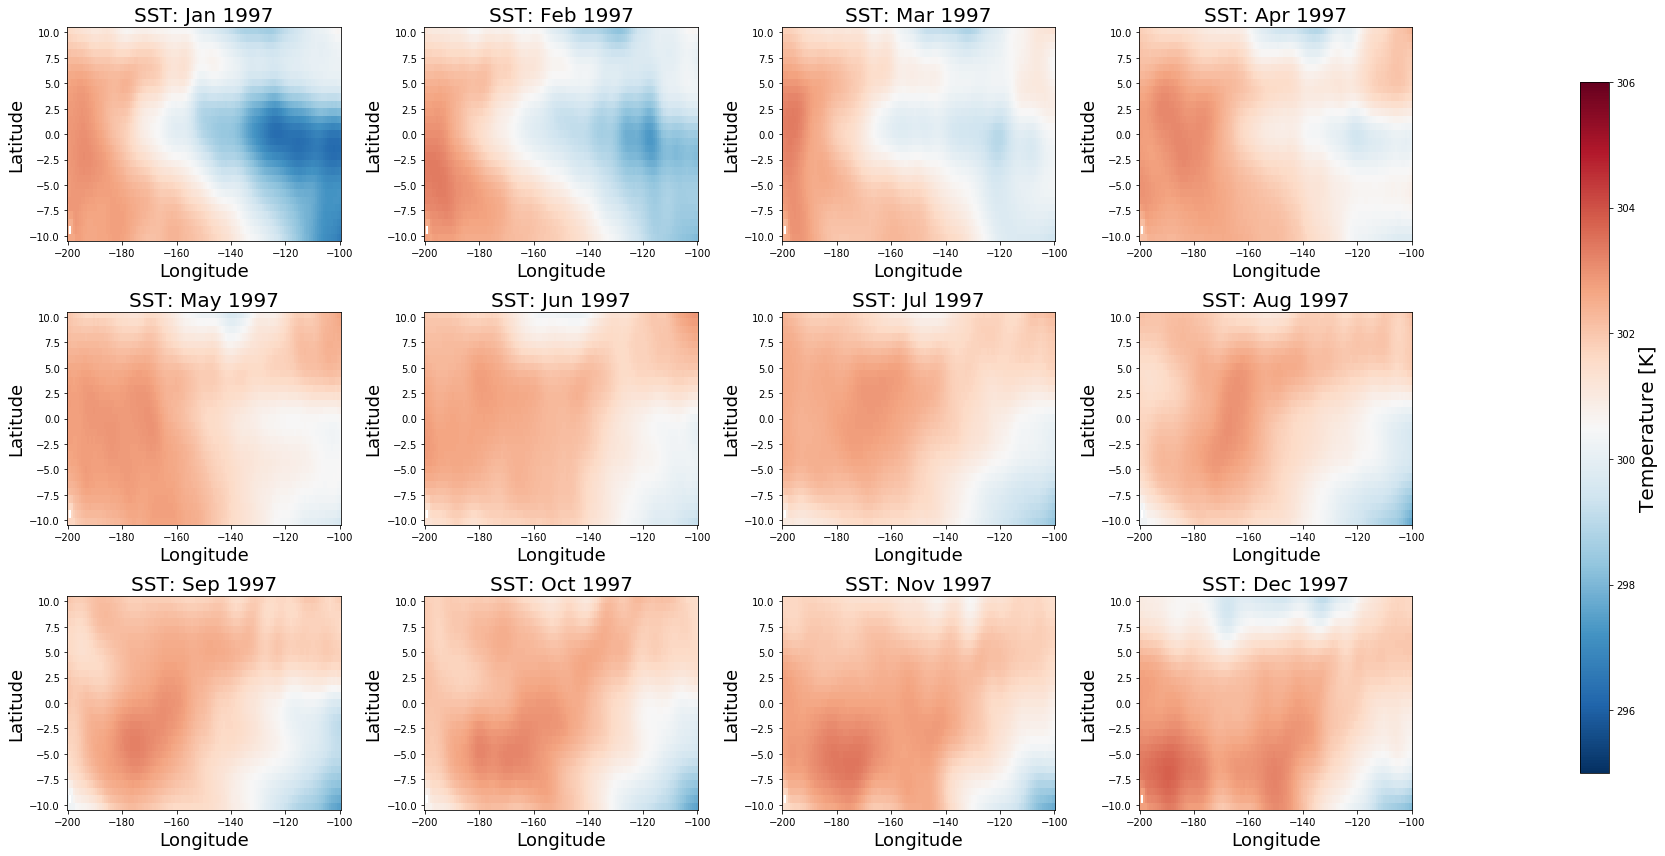

In [60]:
#plot temp for each month in 1997, since this year had a strong El Nino event

saveIt = 0

#vmin = np.min([T[12*18+month,:,:] for month in range(12)])
#vmax = np.max([T[12*18+month,:,:] for month in range(12)])
vmin = 273+22
vmax = 273+33

nrows = 3
ncols = 4
fig,axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*5, nrows*4))

month = 0
for ax in axes.flat:
    #ax.set_axis_off()
    im = ax.imshow(np.squeeze(T[12*18+month,:,:]), extent=T_extent,cmap = 'RdBu_r',vmin=vmin,vmax=vmax,aspect='auto')
    ax.plot(coastLon,coastLat,c='k')
    ax.set_xlim(T_extent[:2])
    ax.set_ylim(T_extent[2:])
    ax.set_xlabel('Longitude', fontsize = 18)
    ax.set_ylabel('Latitude', fontsize = 18)
    ax.set_title('SST: ' + months[month] +' 1997', fontsize = 20)
    #plt.colorbar()
    month+=1
    
plt.tight_layout()    
cb_ax = fig.add_axes([1.1, 0.1, 0.02, 0.8])
cbar = fig.colorbar(im, cax=cb_ax)
cb_ax.set_ylabel('Temperature [K]',fontsize = 20)

if saveIt:
    plt.savefig('tutorial4_fig9.png')

plt.show()

Preprocessing: remove seasonal cycle and apply 3-month running mean -- we want smoothed anomalies!

In [61]:
##remove last 7 months from 2017, so the timeseries line up
T_cut = T[:-6]
T2d_cut = T2d[:,:-6]

#calculate seasonal signal for each grid point
nyears = 38
T2d_seasonal = np.empty((np.shape(T2d)[0],12))
for ii in range(len(T2d_cut)):
    T2d_seasonal[ii,:] = np.mean(np.reshape(T2d_cut[ii,:],(nyears,12)),axis=0)

#repeat the seasonal cycle for all years
T2d_seasonal_all = np.tile(T2d_seasonal,(1,nyears))

#remove seasonal cycle from the original data (calculate anomalies)
T2d_anomalies = T2d_cut - T2d_seasonal_all

#apply 3-month running mean on each grid point 
T2d_anomalies_smooth = np.empty_like(T2d_anomalies)
N=3 #length of moving window
for ii in range(len(T2d_anomalies)):
    x=T2d_anomalies[ii,:]
    T2d_anomalies_smooth[ii,:] = np.convolve(x, np.ones((N,))/N, mode='same')


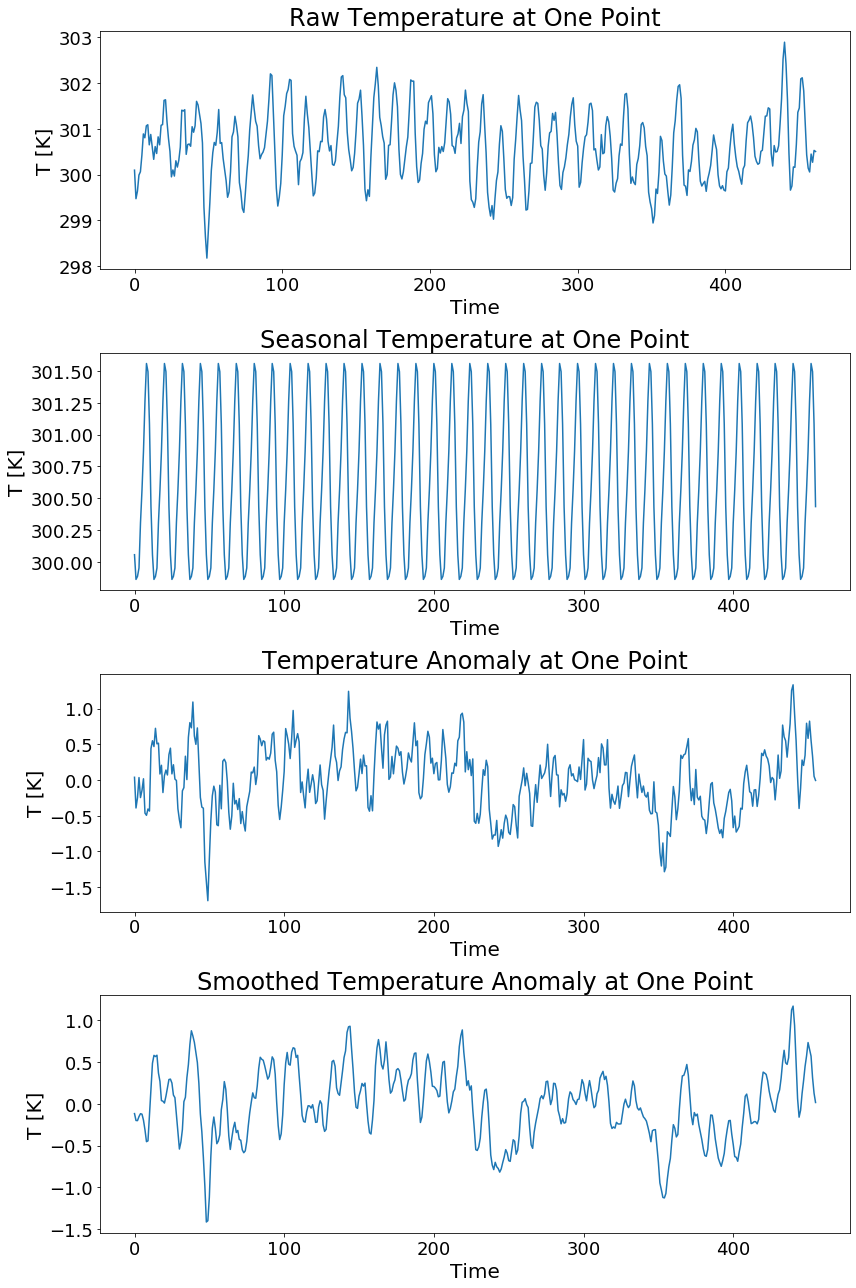

In [62]:
#let's visualize all of these great pre-processing steps!

saveIt = 0

gridIndex = 50 #arbitrary grid point to visualize the preprocessing for

plt.figure(figsize=(12,18))

plt.subplot(4,1,1)
plt.plot(T2d[gridIndex,:])
plt.xlabel('Time', fontsize = 20)
plt.ylabel('T [K]', fontsize = 20)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.title('Raw Temperature at One Point', fontsize = 24)

plt.subplot(4,1,2)
plt.plot(T2d_seasonal_all[gridIndex,:])
plt.xlabel('Time', fontsize = 20)
plt.ylabel('T [K]', fontsize = 20)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.title('Seasonal Temperature at One Point', fontsize = 24)

plt.subplot(4,1,3)
plt.plot(T2d_anomalies[gridIndex,:])
plt.xlabel('Time', fontsize = 20)
plt.ylabel('T [K]', fontsize = 20)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.title('Temperature Anomaly at One Point', fontsize = 24)

plt.subplot(4,1,4)
plt.plot(T2d_anomalies_smooth[gridIndex,:])
plt.xlabel('Time', fontsize = 20)
plt.ylabel('T [K]', fontsize = 20)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.title('Smoothed Temperature Anomaly at One Point', fontsize = 24)

plt.tight_layout()

if saveIt:
    plt.savefig('tutorial4_fig10.png')

plt.show()

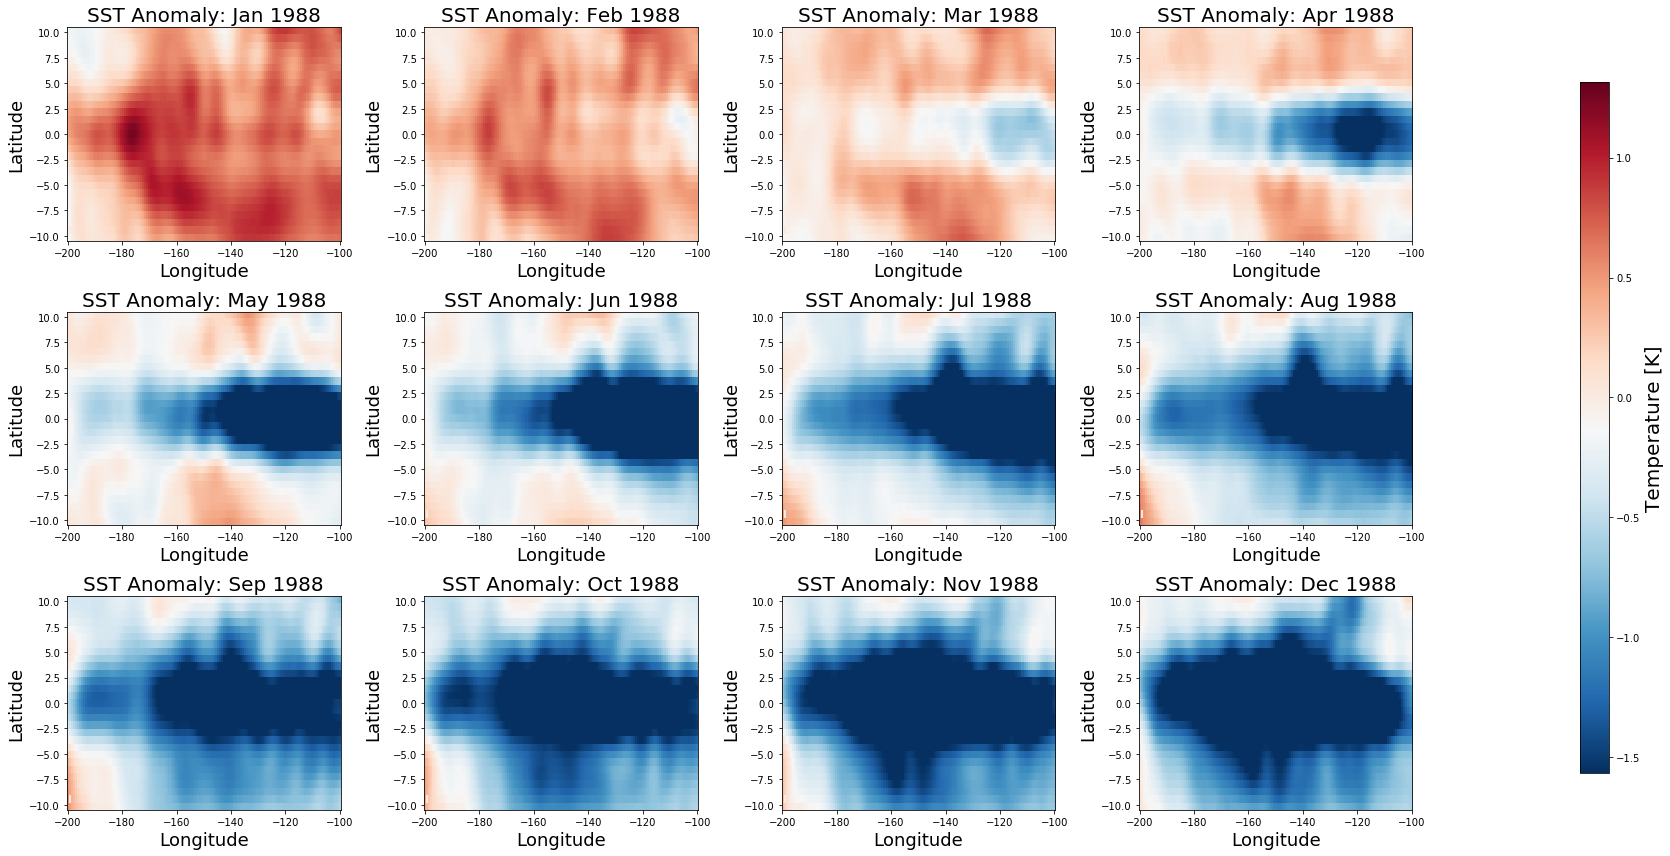

In [63]:
#plot the 3-month running mean of residuals for all grid points for all months of 1988

saveIt = 0

vmin = np.min([T2d_anomalies_smooth[12*9+month,:] for month in range(12)])
vmax = np.max([T2d_anomalies_smooth[12*9+month,:] for month in range(12)])

nrows = 3
ncols = 4
fig,axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*5, nrows*4))

month = 0
for ax in axes.flat:
    #ax.set_axis_off()
    im = ax.imshow(np.reshape(T2d_anomalies_smooth[:,12*9+month],(np.shape(T)[1:])), extent=T_extent,cmap = 'RdBu_r',vmin=vmin,vmax=vmax,aspect='auto')
    ax.plot(coastLon,coastLat,c='k')
    ax.set_xlim(T_extent[:2])
    ax.set_ylim(T_extent[2:])
    ax.set_xlabel('Longitude', fontsize = 18)
    ax.set_ylabel('Latitude', fontsize = 18)
    ax.set_title('SST Anomaly: ' + months[month] +' 1988', fontsize = 20)
    month+=1
    
plt.tight_layout()   
cb_ax = fig.add_axes([1.1, 0.1, 0.02, 0.8])
cbar = fig.colorbar(im, cax=cb_ax)
cb_ax.set_ylabel('Temperature [K]',fontsize = 20)

if saveIt:
    plt.savefig('tutorial4_fig11.png')

plt.show()

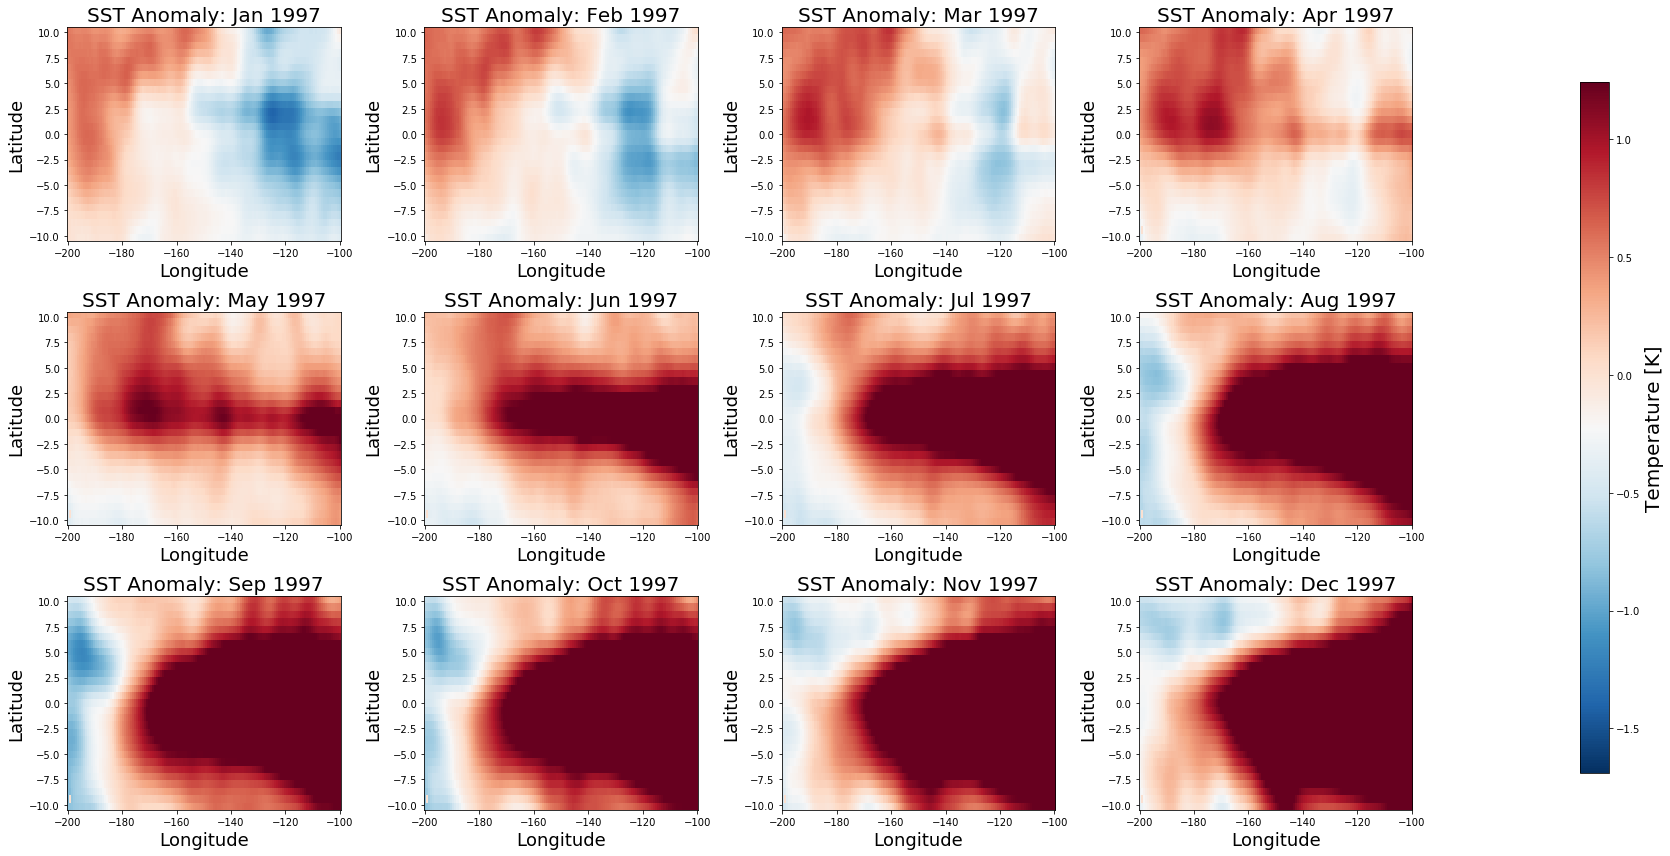

In [64]:
#plot the 3-month running mean of residuals for all grid points for all months of 1997

saveIt = 0

vmin = np.min([T2d_anomalies_smooth[12*18+month,:] for month in range(12)])
vmax = np.max([T2d_anomalies_smooth[12*18+month,:] for month in range(12)])

nrows = 3
ncols = 4
fig,axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*5, nrows*4))

month = 0
for ax in axes.flat:
    im = ax.imshow(np.reshape(T2d_anomalies_smooth[:,12*18+month],(np.shape(T)[1:])), extent=T_extent,cmap = 'RdBu_r',vmin=vmin,vmax=vmax,aspect='auto')
    ax.plot(coastLon,coastLat,c='k')
    ax.set_xlim(T_extent[:2])
    ax.set_ylim(T_extent[2:])
    ax.set_xlabel('Longitude', fontsize = 18)
    ax.set_ylabel('Latitude', fontsize = 18)
    ax.set_title('SST Anomaly: ' + months[month] +' 1997', fontsize = 20)
    #plt.colorbar()
    month+=1

plt.tight_layout()
cb_ax = fig.add_axes([1.1, 0.1, 0.02, 0.8])
cbar = fig.colorbar(im, cax=cb_ax)
cb_ax.set_ylabel('Temperature [K]',fontsize = 20)

if saveIt:
    plt.savefig('tutorial4_fig12.png')

plt.show()

In [65]:
#do PCA using built-in library

data = T2d_anomalies_smooth.T

n_modes = np.min(np.shape(data))
pca = PCA(n_components = n_modes)
PCs = pca.fit_transform(data)
eigvecs = pca.components_
fracVar = pca.explained_variance_ratio_

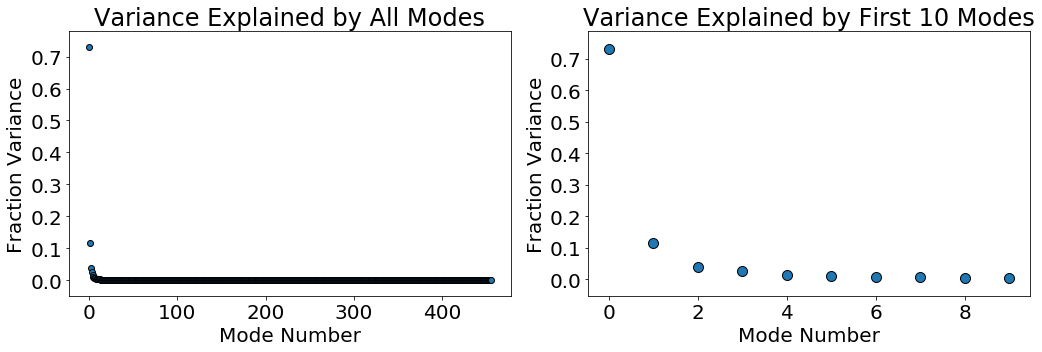

In [66]:
#plot fraction of variance explained by each mode

saveIt = 0

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.scatter(range(len(fracVar)),fracVar, edgecolor = 'k')
plt.xlabel('Mode Number', fontsize = 20)
plt.ylabel('Fraction Variance', fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.title('Variance Explained by All Modes', fontsize = 24)

plt.subplot(1,2,2)
n_modes_show = 10
plt.scatter(range(n_modes_show),fracVar[:n_modes_show], s =100, edgecolor = 'k')
plt.xlabel('Mode Number', fontsize = 20)
plt.ylabel('Fraction Variance', fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.title('Variance Explained by First ' + str(n_modes_show) + ' Modes', fontsize = 24)

plt.tight_layout()

if saveIt:
    plt.savefig('tutorial4_fig13.png')

plt.show()

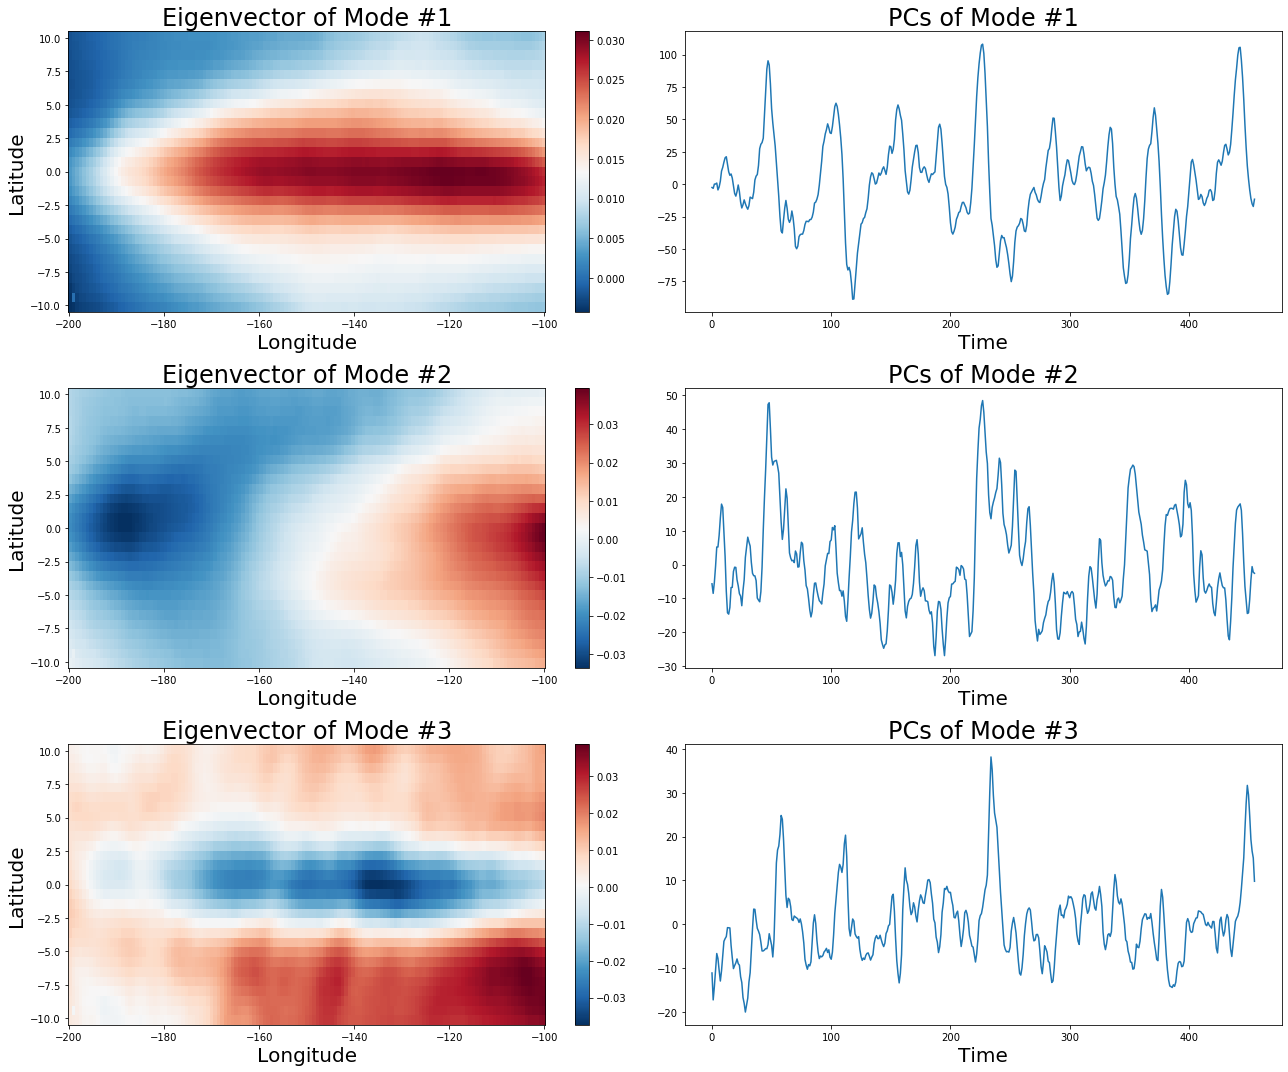

In [67]:
#plot the first n modes and PCs -- choose a value of 'n' from the variance explained figure!

saveIt = 0

n = 3

plt.figure(figsize=(18,5*n))
for kk in range(n):
    
    plt.subplot(n,2,kk*2+1)
    plt.imshow(np.reshape(eigvecs[kk,:],(np.shape(T)[1:])),extent=T_extent,cmap = 'RdBu_r',aspect='auto')
    plt.plot(coastLon,coastLat,c='k')
    plt.xlabel('Longitude',fontsize = 20)
    plt.ylabel('Latitude',fontsize = 20)
    plt.xlim(T_extent[:2])
    plt.ylim(T_extent[2:])
    plt.title('Eigenvector of Mode #' + str(kk+1), fontsize = 24)
    plt.colorbar()
    
    plt.subplot(n,2,(kk+1)*2)
    plt.plot(PCs[:,kk])
    plt.title('PCs of Mode #' + str(kk+1), fontsize = 24)
    plt.xlabel('Time', fontsize = 20)
    
plt.tight_layout()
    
if saveIt:
    plt.savefig('tutorial4_fig14.png')
    
plt.show()

In [68]:
#find El Nino and La Nina as peaks/valleys in PC1 time series

allElNino = find_peaks(PCs[:,0],height=45, width=2)[0]
allLaNina= find_peaks(-PCs[:,0], height=45, width=2)[0]

strongElNino = find_peaks(PCs[:,0], height=80, width=2)[0]
strongLaNina = find_peaks(-PCs[:,0], height=85, width=2)[0]

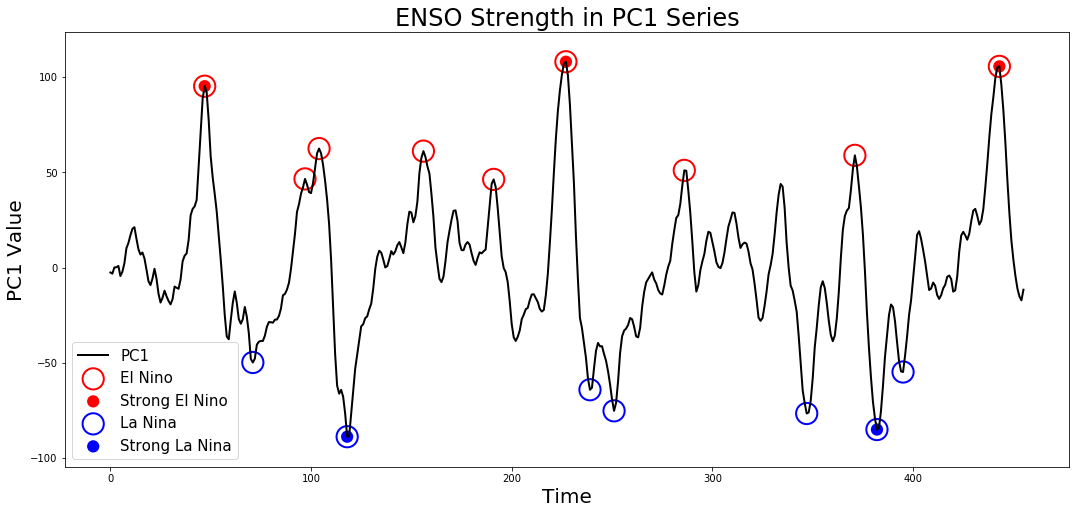

In [69]:
#visualize

saveIt = 0

plt.figure(figsize=(18,8))

plt.plot(PCs[:,0], color = 'k', linewidth = 2)
plt.scatter(allElNino,PCs[allElNino,0],facecolors=[],edgecolors='r',linewidth = 2, s=450)
plt.scatter(strongElNino,PCs[strongElNino,0],facecolors='r',edgecolors=[], s = 150)
plt.scatter(allLaNina,PCs[allLaNina,0],facecolors=[],edgecolors='b',linewidth = 2, s=450)
plt.scatter(strongLaNina,PCs[strongLaNina,0],facecolors='b',edgecolors=[], s = 150)
plt.xlabel('Time', fontsize = 20)
plt.ylabel('PC1 Value', fontsize = 20)
plt.title('ENSO Strength in PC1 Series', fontsize = 24)

plt.legend(['PC1','El Nino','Strong El Nino','La Nina','Strong La Nina'], fontsize = 15, loc = 'best')

if saveIt:
    plt.savefig('tutorial4_fig15.png')

plt.show()

In [70]:
#visualize PC space with a Widget!  This may only work on Syzygy:
# https://ubc.syzygy.ca/jupyter/hub/user-redirect/git-pull?repo=https://github.com/andersonsam/eosc_410&branch=master

PC1 = PCs[:,0]
PC2 = PCs[:,1]
PC3 = PCs[:,2]
sliderPC1 = ipywidgets.FloatSlider(value = 0, min=np.min(PC1), max = np.max(PC1), description = 'PC1', continuous_update=False)
sliderPC2 = ipywidgets.FloatSlider(value = 0, min=np.min(PC2), max = np.max(PC2), description = 'PC2', continuous_update=False)
sliderPC3 = ipywidgets.FloatSlider(value = 0, min=np.min(PC3), max = np.max(PC3), description = 'PC3', continuous_update=False)
PC_1_2_3 = pd.DataFrame(data = [PC1,PC2,PC3]).T

@ipywidgets.interact(PC1 = sliderPC1, PC2 = sliderPC2, PC3 = sliderPC3, eigvecs = eigvecs, PCs = PCs)

def plot_PCs(PC1,PC2,PC3):

    plt.figure(figsize=(20,5))
    
    plt.subplot(1,3,1)
    plt.scatter(PCs[:,0],PCs[:,1], alpha = 0.3, s = 50)
    plt.scatter(PC1,PC2,c='k',s = 100)
    plt.xlabel('PC1', fontsize = 20)
    plt.ylabel('PC2', fontsize = 20)
    plt.title('PC Space', fontsize = 24)
    
    plt.subplot(1,3,2)
    yrec = eigvecs[0,:]*PC1 + eigvecs[1,:]*PC2 + eigvecs[2,:]*PC3
    plt.imshow(np.reshape(yrec,(np.shape(T)[1:])),extent=T_extent,cmap = 'RdBu_r',aspect='auto')
    #plt.plot(yrec)
    plt.xlabel('Longitude', fontsize = 20)
    plt.ylabel('Latitude', fontsize = 20)
    plt.title('Reconstructed Data', fontsize = 24)
    
    plt.subplot(1,3,3)
    plt.imshow(np.reshape(yrec,(np.shape(T)[1:])),extent=T_extent,cmap = 'RdBu_r',aspect='auto')
    plt.plot(coastLon,coastLat,c='k')
    plt.xlabel('Longitude', fontsize = 20)
    plt.ylabel('Latitude', fontsize = 20)
    plt.title('SST: Jan 1979', fontsize = 24)
    plt.colorbar(label = 'Temperature [K]')
    
    plt.tight_layout()
    
    plt.show()

interactive(children=(FloatSlider(value=0.0, continuous_update=False, description='PC1', max=108.1211191501265…